In [3]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Loading in csv files:

In [4]:
humidity_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/humidity.csv")
pressure_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/pressure.csv")
temperature_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/temperature.csv")
wind_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/wind_speed.csv")
description_data = read_csv("https://raw.githubusercontent.com/StuartLiv/DSCI100Group/main/data/weather_description.csv")

Parsed with column specification:
cols(
  .default = col_double(),
  datetime = col_datetime(format = "")
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  datetime = col_datetime(format = "")
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  datetime = col_datetime(format = "")
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_double(),
  datetime = col_datetime(format = "")
)

See spec(...) for full column specifications.

Parsed with column specification:
cols(
  .default = col_character(),
  datetime = col_datetime(format = "")
)

See spec(...) for full column specifications.



Selecting Vancouver columns

In [5]:
humidity_van = select(humidity_data, datetime, Vancouver)
pressure_van = select(pressure_data, datetime, Vancouver)
temperature_van = select(temperature_data, datetime, Vancouver)
wind_van = select(wind_data, datetime, Vancouver)
description_van = select(description_data, datetime, Vancouver)

Merge Datasets

In [6]:
weather_data_verbose = left_join(humidity_van, pressure_van, by = "datetime") %>%
                left_join(temperature_van, by = "datetime") %>%
                left_join(wind_van, by = "datetime") %>%
                left_join(description_van) %>%
                `colnames<-`(c("datetime", "humidity.pct", "pressure.kpa", "temperature.c", "wind_speed.m/s", "description")) %>%
                na.omit() %>%
                mutate(temperature.c = temperature.c - 273.15)

head(weather_data_verbose)

Joining, by = "datetime"



datetime,humidity.pct,pressure.kpa,temperature.c,wind_speed.m/s,description
<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
2012-10-02 09:00:00,87,807,11.44022,0,broken clouds
2012-10-02 10:00:00,88,849,11.43817,0,broken clouds
2012-10-02 11:00:00,89,890,11.43613,0,broken clouds
2012-10-02 12:00:00,89,932,11.43409,0,broken clouds
2012-10-02 13:00:00,90,973,11.43204,0,broken clouds
2012-10-02 14:00:00,91,1015,11.43000,0,sky is clear


In [7]:
weather_data = weather_data_verbose %>% 
            filter(description != 'volcanic ash' & description != 'dust' & description != 'smoke' & description != 'haze') %>%
            mutate(description = case_when(description %in% c('broken clouds', 'few clouds', 'overcast clouds', 'scattered clouds') ~ 'cloudy',
                                           description %in% c('heavy intensity rain', 'heavy intensity shower rain', 'very heavy rain') ~ 'heavy rain',
                                           description %in% c('drizzle', 'light intensity drizzle', 'light intensity drizzle rain', 'light intensity shower rain', 'light rain and snow') ~ 'light rain',
                                           description %in% c('heavy shower snow', 'light shower snow', 'heavy snow', 'light snow', 'shower snow') ~ 'snow',
                                           description %in% c('proximity thunderstorm', 'ragged thunderstorm', 'thunderstorm with heavy rain', 'thunderstorm with light rain', 'thunderstorm with rain') ~ 'thunderstorm',
                                           description %in% c('proximity shower rain', 'shower rain') ~ 'moderate rain',
                                           description == 'light shower sleet' ~ 'sleet',
                                           description == 'mist' ~ 'fog',
                                           description == 'sky is clear' ~ 'clear sky',
                                           TRUE ~ description)) %>%
            mutate(description = as.factor(description))
            

levels(pull(weather_data, description))

[1] "clear sky"     "cloudy"        "fog"           "heavy rain"   
[5] "light rain"    "moderate rain" "sleet"         "snow"         
[9] "thunderstorm"

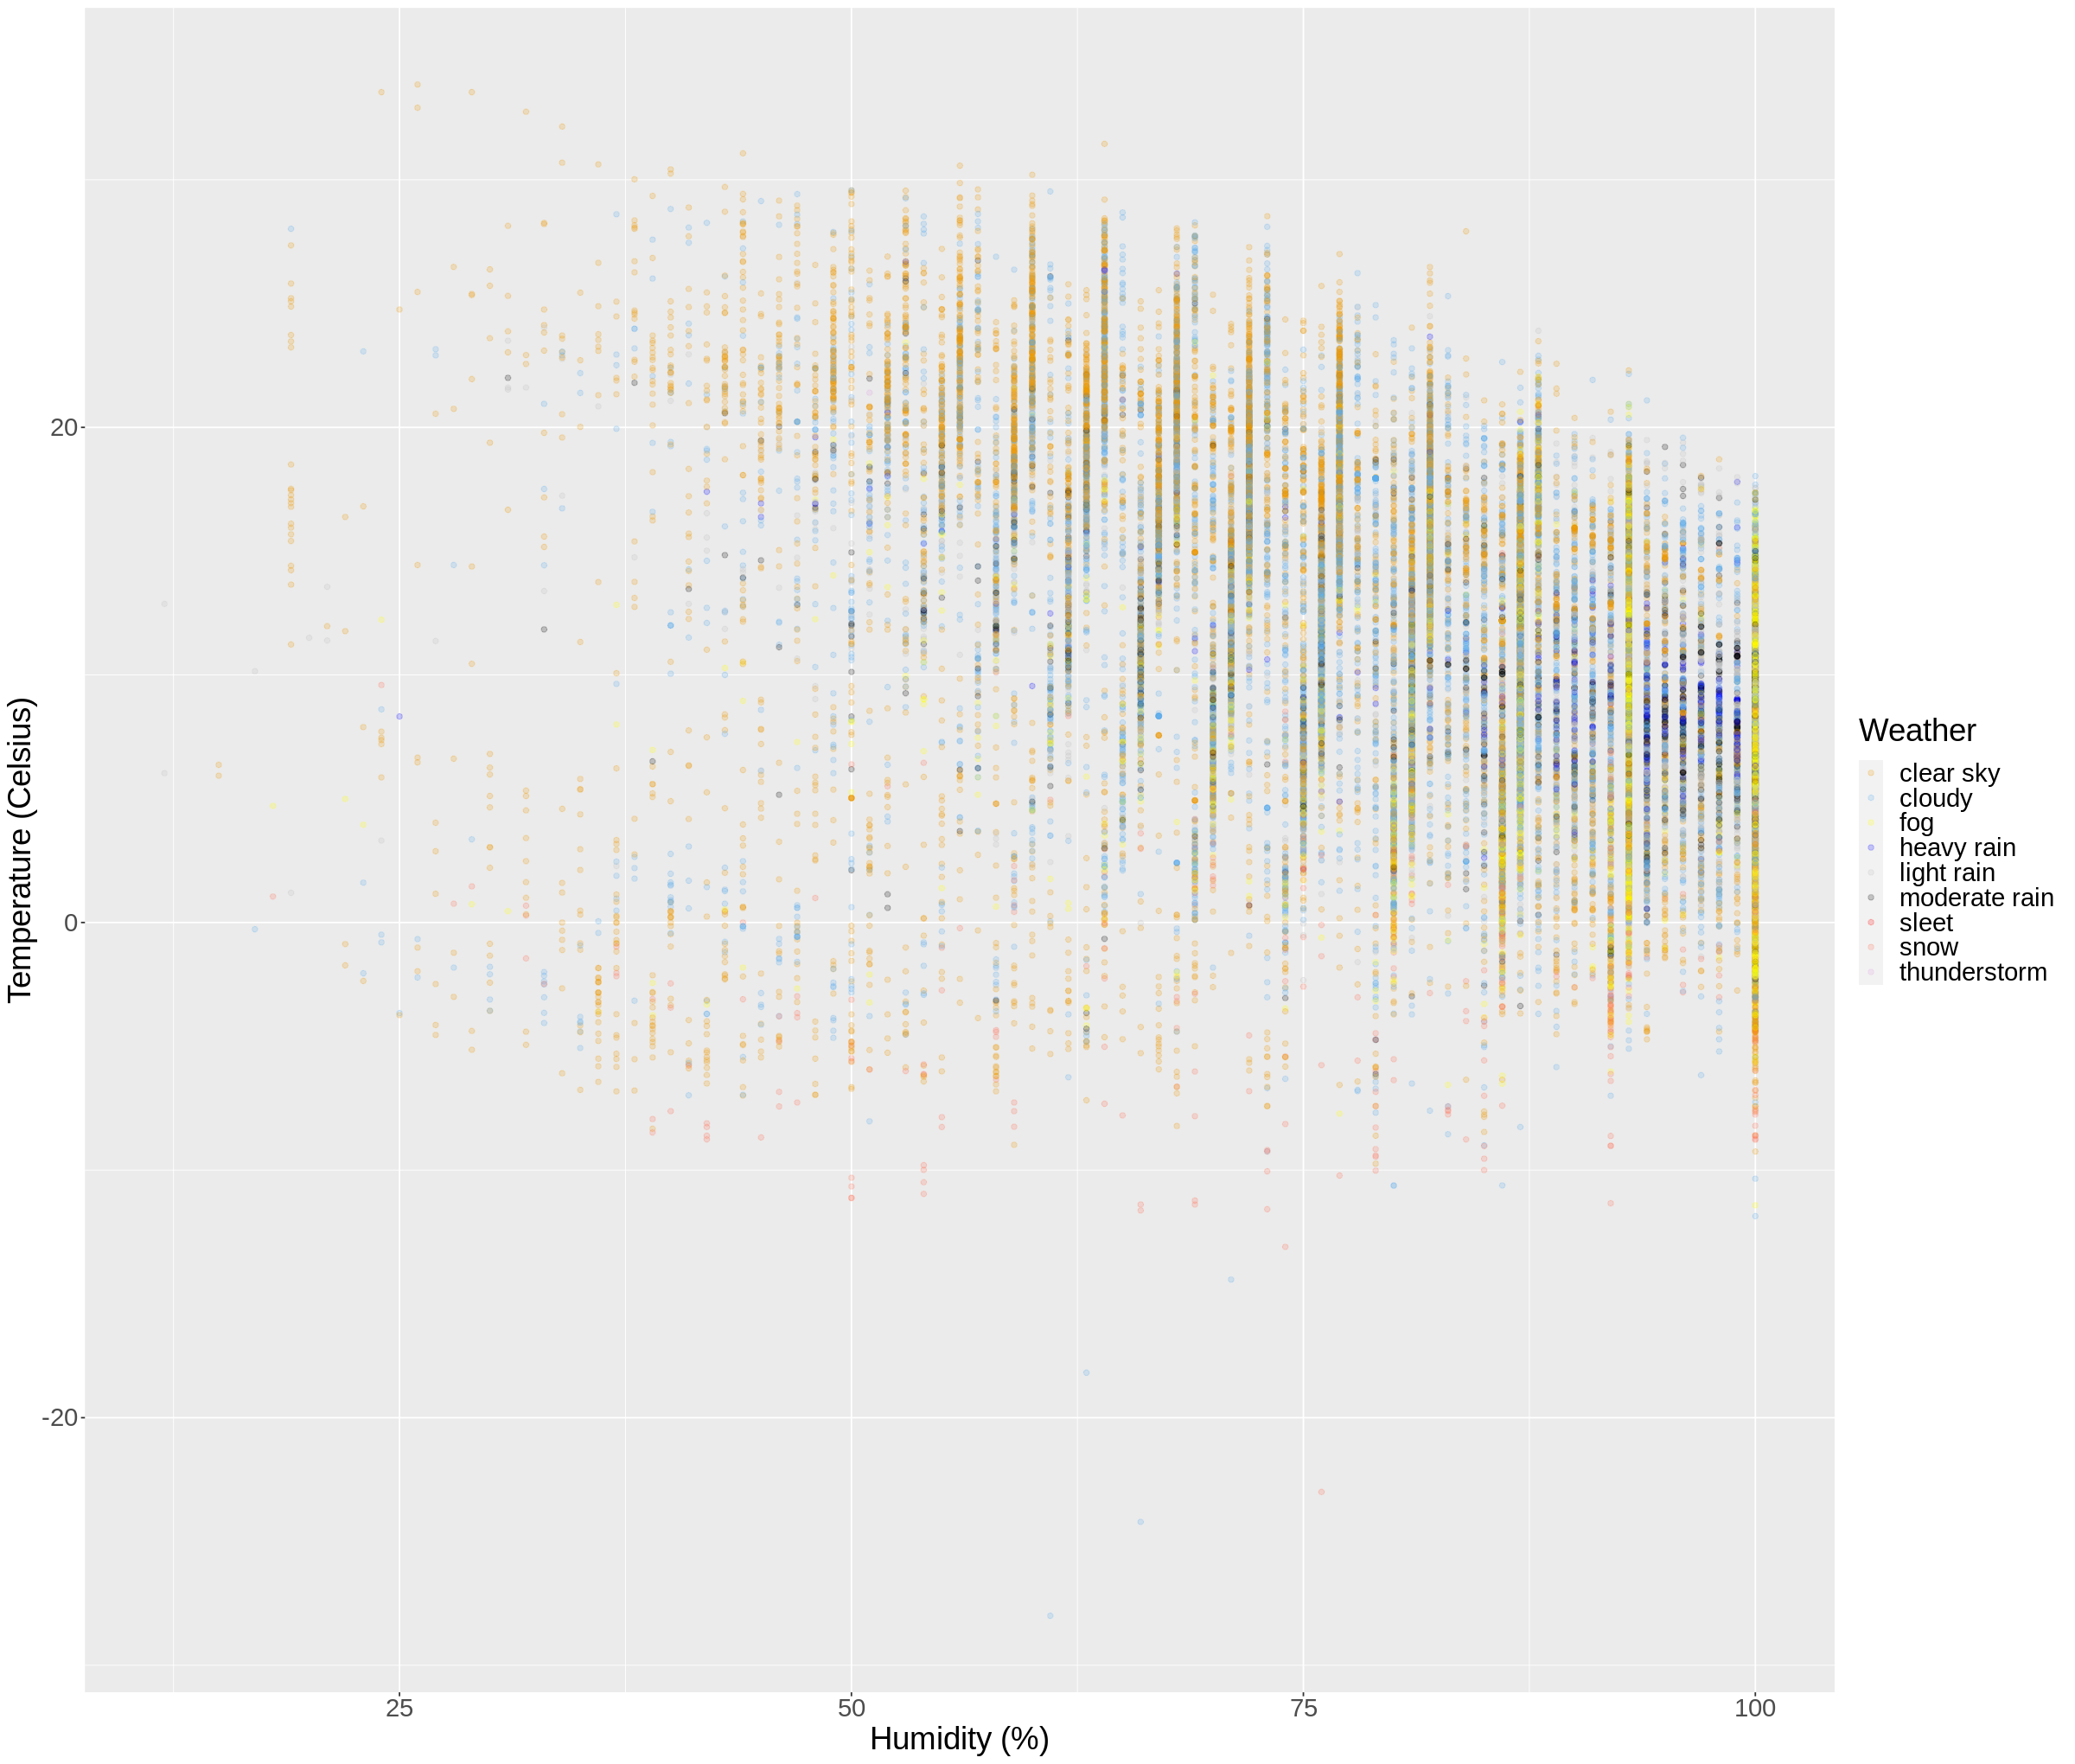

In [8]:
options(repr.plot.width = 20, repr.plot.height = 17) 

weather_data_plot <- weather_data %>%
  ggplot(aes(x = humidity.pct, y = temperature.c, color = description)) +
  geom_point(alpha = 0.2) +
  labs(x = "Humidity (%)", 
       y = "Temperature (Celsius)",
       color = "Weather") +
  scale_color_manual(labels = c("clear sky", "cloudy", "fog", "heavy rain", "light rain", "moderate rain", "sleet", "snow", "thunderstorm"), 
                     values = c("orange2", "steelblue2", "yellow", "blue", "grey", "grey0", "red", "coral1", "plum")) +
  theme(text = element_text(size = 22))
weather_data_plot
